# DBSCAN

## Homework #9 by Glaktionova Natalia

Dresses_Attribute_Sales Data Set

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

from sklearn.manifold import TSNE

Считываем и просматриваем данные

In [6]:
df = pd.read_excel('data\Dresses_Attribute_Sales\Attribute DataSet.xlsx')
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


Удалим некорректные значения

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
Dress_ID          500 non-null int64
Style             500 non-null object
Price             498 non-null object
Rating            500 non-null float64
Size              500 non-null object
Season            498 non-null object
NeckLine          497 non-null object
SleeveLength      498 non-null object
waiseline         413 non-null object
Material          372 non-null object
FabricType        234 non-null object
Decoration        264 non-null object
Pattern Type      391 non-null object
Recommendation    500 non-null int64
dtypes: float64(1), int64(2), object(11)
memory usage: 33.3+ KB


In [10]:
df.drop(columns=['Dress_ID'], inplace=True)

In [11]:
df.describe()

,Rating,Recommendation
count,500.000000,500.000000
mean,3.528600,0.420000
std,2.005364,0.494053
min,0.000000,0.000000
25%,3.700000,0.000000
50%,4.600000,0.000000
75%,4.800000,1.000000
max,5.000000,1.000000


In [12]:
df.describe(include=['object'])

,Style,Price,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
count,500,498,500,498,497,498,413,372,234,264,391
unique,13,7,7,8,16,17,4,23,22,24,14
top,Casual,Average,M,Summer,o-neck,sleevless,natural,cotton,chiffon,lace,solid
freq,232,252,177,159,271,223,304,152,135,70,203


Заполним пустые значения самыми частотными

In [17]:
df.fillna(df.mode().iloc[0], inplace=True)

In [41]:
df.describe(include=['object'])

,Style,Price,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
count,500,500,500,500,500,500,500,500,500,500,500
unique,13,7,7,8,16,17,4,23,22,24,14
top,Casual,Average,M,Summer,o-neck,sleevless,natural,cotton,chiffon,lace,solid
freq,232,254,177,161,274,225,391,280,401,306,312


In [43]:
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head()

,Style,Price,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
0,5,2,1,3,7,10,1,3,3,20,0
1,1,2,0,3,7,0,2,8,3,20,0
2,11,1,0,0,7,4,2,15,3,12,10
3,0,0,0,2,7,4,2,18,3,8,10
4,7,2,1,3,7,1,2,2,3,3,2


### K-means

In [46]:
silhouette = []
inertia = []
k = range(2, 10)

for k_i in k:
    km = KMeans(n_clusters=k_i, random_state=42).fit(df)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(df, km.labels_))

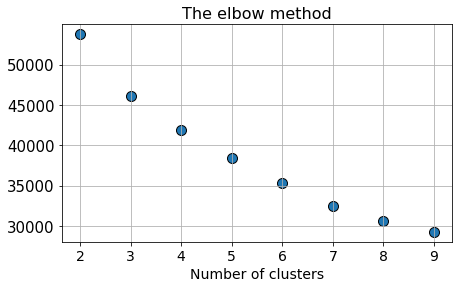

In [47]:
plt.figure(figsize=(7,4))
plt.title("The elbow method",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=inertia,s=100,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.xticks([i for i in range(2,10)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Метод локтя не дает четкой картины

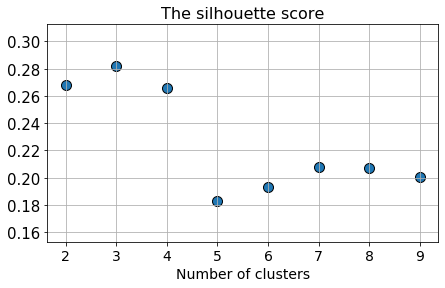

In [48]:
plt.figure(figsize=(7,4))
plt.title("The silhouette score",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=silhouette,s=100,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.xticks([i for i in range(2,10)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Возьмем число кластеров равным 3

### Hierarchy

In [49]:
distance_mat = pdist(df)
Z = hierarchy.linkage(distance_mat, 'ward')

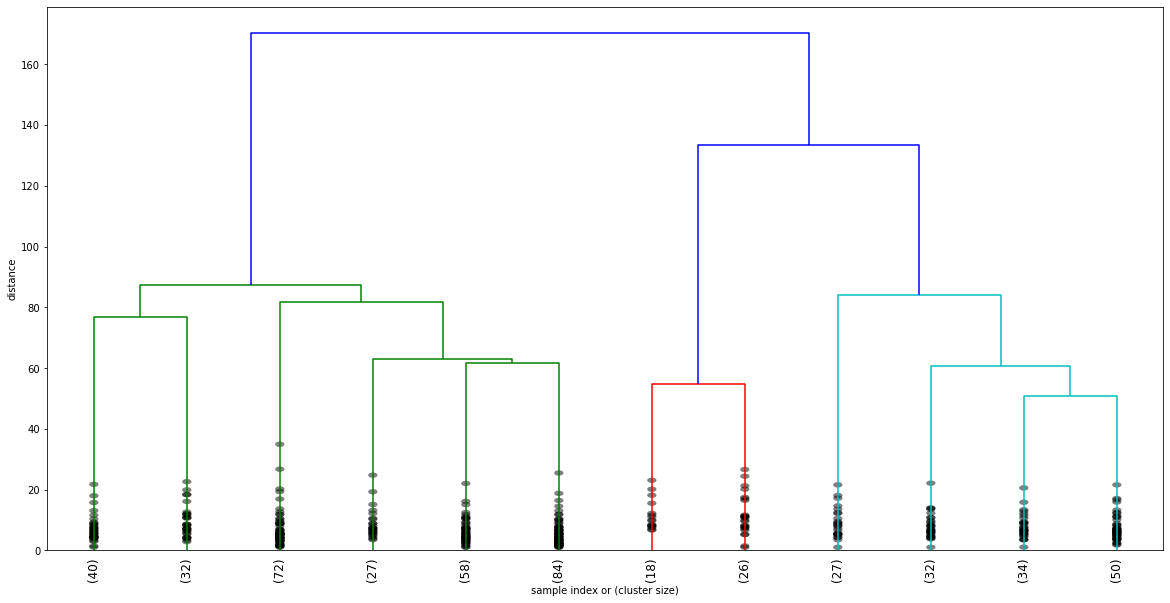

In [50]:
plt.figure(figsize=(20, 10))

plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
hierarchy.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Здесь также можно выделить 3 кластера

### DBSCAN

In [124]:
db = DBSCAN(eps=14, min_samples=4, metric='cityblock').fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: {}'.format(n_clusters_))
print('Estimated percentage of noise points: {:.2f}%'.format(100*n_noise_/df.shape[0]))

Estimated number of clusters: 4
Estimated percentage of noise points: 14.40%


**TSNE**

In [87]:
tsne = TSNE(perplexity=50)
tsne_transformed = tsne.fit_transform(df)

In [89]:
km = KMeans(n_clusters=3).fit(df)

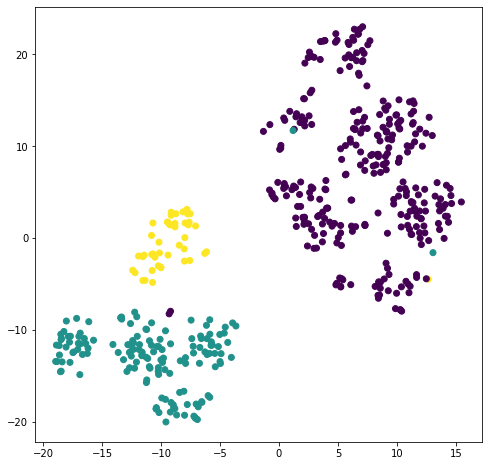

In [93]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=km.labels_);

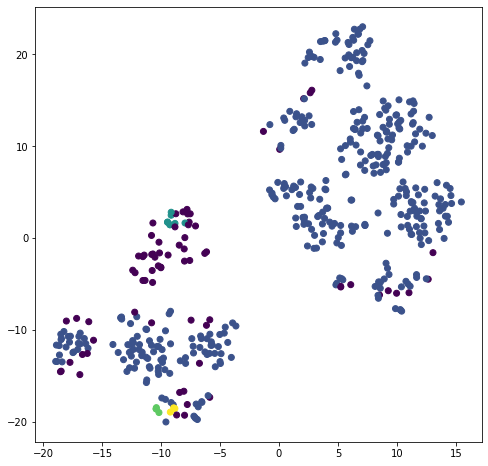

In [125]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=db.labels_);

С помощью Kmeans мы получили очень хороший результат. DBSCAN не справился